Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import gdown
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Initialization & Dependencies
* Supply the jar/war file as input into the java code analyzer to generate the dependecy file  
* Load the dependency file by providing the location url




In [ ]:
from os import name

pathJ = '/content/drive/MyDrive/Data -- Dependencies/petclinic_angularjs.txt'
data = pd.DataFrame()
data = pd.read_csv(pathJ, sep=' ', header=None, names=["caller", "callee"], engine='python', on_bad_lines='warn')


In [ ]:
print((data))
data = data.dropna()
data

                                                 caller  \
0     C:org.springframework.boot.loader.data.RandomA...   
1     C:org.springframework.boot.loader.data.RandomA...   
2     C:org.springframework.boot.loader.data.RandomA...   
3     C:org.springframework.boot.loader.data.RandomA...   
4     C:org.springframework.boot.loader.data.RandomA...   
...                                                 ...   
2662  M:org.springframework.samples.petclinic.model....   
2663  M:org.springframework.samples.petclinic.web.Ab...   
2664  M:org.springframework.samples.petclinic.model....   
2665  M:org.springframework.samples.petclinic.model....   
2666  M:org.springframework.samples.petclinic.model....   

                                                 callee  
0                        java.lang.NullPointerException  
1     org.springframework.boot.loader.data.RandomAcc...  
2                                   java.io.InputStream  
3                                   java.io.IOException  
4

,caller,callee
0,C:org.springframework.boot.loader.data.RandomA...,java.lang.NullPointerException
1,C:org.springframework.boot.loader.data.RandomA...,org.springframework.boot.loader.data.RandomAcc...
2,C:org.springframework.boot.loader.data.RandomA...,java.io.InputStream
3,C:org.springframework.boot.loader.data.RandomA...,java.io.IOException
4,C:org.springframework.boot.loader.data.RandomA...,org.springframework.boot.loader.data.RandomAcc...
...,...,...
2662,M:org.springframework.samples.petclinic.model....,(O)java.util.ArrayList:<init>()
2663,M:org.springframework.samples.petclinic.web.Ab...,(O)java.lang.Object:<init>()
2664,M:org.springframework.samples.petclinic.model....,(O)org.springframework.samples.petclinic.model...
2665,M:org.springframework.samples.petclinic.model....,(O)org.springframework.samples.petclinic.model...


# **Data Preprocessing**


*   **Extracting** methods
*   **Tagging**: caller => callee
*   **Parsing**: identify relevant information
*   **Data structuring**: Methods are nodes with package, class methodName, id and stored in a dataframe.






In [ ]:
# Source nodes
extracted_info_caller = []
idxInitial = np.where(data['caller'].str.startswith('M:'))[0][0]
data_methods = data.iloc[idxInitial:]

for line in data_methods['caller']:
    if line.startswith('M:'):
      parts = line.split()
      package_class_method_part = parts[0][2:]
      package_class_name, method_part = package_class_method_part.split(':')
      method_name = method_part.split('(')[0]
      class_name = package_class_name.split('.')[-1]
      package_name = package_class_name.split('.')[-2]
      extracted_info_caller.append({'package': package_name, 'class': class_name, 'method': method_name})

Applying a similar process on the callee column of our dataset

In [ ]:
# Target nodes
extracted_info_callee = []
calltypes = []

for line in data_methods['callee']:
  if line.startswith('('):
    calltypes.append(line[1])
    parts = line.split()
    package_class_method_part = parts[0][2:]
    package_class_name, method_part = package_class_method_part.split(':')
    method_name = method_part.split('(')[0]
    class_name = package_class_name.split('.')[-1]
    package_name = package_class_name.split('.')[-2]
    extracted_info_callee.append({'package': package_name, 'class': class_name, 'method': method_name})

# Meta-data
Counting the number of distinct methods before further processing.
* Unique methods count
* Set of methods

In [ ]:
data_classes = data[data['caller'].str.startswith('C:')]

# Combine dictionaries from both lists
combined_list = extracted_info_caller + extracted_info_callee

# Create a set to store unique combinations
unique_combinations = set()

# Iterate through the combined list and add unique combinations to the set based on method names
for item in combined_list:
    combination = (item['method'])
    unique_combinations.add(combination)

unique_dependencies = set()
# Iterate through the combined list and add unique combinations to the set
for item2 in combined_list:
    combination = (item2['method'], item2['class'], item2['package'])
    unique_dependencies.add(combination)

# Count the number of unique combinations
unique_count = len(unique_combinations)
unique_dependencies_count = len(unique_dependencies)

print(f"Number of unique methods: {unique_count} vs {unique_dependencies_count} unique combinations of package, class and methods.")

print("All methods dataframe = ", len(data_methods), " vs Initial input = ", len(data), " vs class dataframe = ", len(data_classes))
print("All caller methods processed = ", len(extracted_info_caller))
print("Callee methods after processing = ", len(extracted_info_callee))

[{'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': '<init>'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'read'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'read'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'read'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'read'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'read'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'doRead'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'doRead'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'doRead'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'skip'}, {'package': 'data', 'class': 'RandomAccessDataFile$DataInputStream', 'method': 'skip'}, {'package': 'data', 'cl

# Data Structuring

In [ ]:
# Dataframe for caller method dependencies from our dataframe, data_methods
source_df = pd.DataFrame(extracted_info_caller)

# Daframe for callee method dependencies
target_df = pd.DataFrame(extracted_info_callee)

print(len(source_df), " source method calls  ******   ", len(target_df), " target method calls")
source_df

1800  source method calls  ******    1800  target method calls


,package,class,method
0,data,RandomAccessDataFile$DataInputStream,<init>
1,data,RandomAccessDataFile$DataInputStream,read
2,data,RandomAccessDataFile$DataInputStream,read
3,data,RandomAccessDataFile$DataInputStream,read
4,data,RandomAccessDataFile$DataInputStream,read
...,...,...,...
1795,model,Vets,getVetList
1796,web,AbstractResourceController,<init>
1797,model,Specialty,<init>
1798,model,Visit,<init>


# Dependency Graph
Creating a graph structure with the NetworkX library

In [ ]:
import networkx as nx

# Create a NetworkX graph
G = nx.DiGraph()

# Add nodes with attributes from the source method calls to the graph
for item in extracted_info_caller:
  unique_id = f"{item['package']}_{item['class']}_{item['method']}"
  G.add_node(unique_id, method_name=item['method'], package=item['package'], class_name=item['class'])


# Same process from the target method calls
for item in extracted_info_callee:
  unique_id = f"{item['package']}_{item['class']}_{item['method']}"
  G.add_node(unique_id, method_name=item['method'] , package=item['package'], class_name=item['class'])


# Now, edges between source and target
for caller, callee in zip(extracted_info_caller, extracted_info_callee):
  source_id = f"{caller['package']}_{caller['class']}_{caller['method']}"
  target_id = f"{callee['package']}_{callee['class']}_{callee['method']}"
  G.add_edge(source_id, target_id)


# Print the graph nodes and edges
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges())

# Example of accessing node attributes:
print("Node count attributes:", len(list(G.nodes)))
print("Edge count attributes:", len(list(G.edges)))


Nodes: [('data_RandomAccessDataFile$DataInputStream_<init>', {'method_name': '<init>', 'package': 'data', 'class_name': 'RandomAccessDataFile$DataInputStream'}), ('data_RandomAccessDataFile$DataInputStream_read', {'method_name': 'read', 'package': 'data', 'class_name': 'RandomAccessDataFile$DataInputStream'}), ('data_RandomAccessDataFile$DataInputStream_doRead', {'method_name': 'doRead', 'package': 'data', 'class_name': 'RandomAccessDataFile$DataInputStream'}), ('data_RandomAccessDataFile$DataInputStream_skip', {'method_name': 'skip', 'package': 'data', 'class_name': 'RandomAccessDataFile$DataInputStream'}), ('data_RandomAccessDataFile$DataInputStream_cap', {'method_name': 'cap', 'package': 'data', 'class_name': 'RandomAccessDataFile$DataInputStream'}), ('jar_CentralDirectoryFileHeader_<init>', {'method_name': '<init>', 'package': 'jar', 'class_name': 'CentralDirectoryFileHeader'}), ('jar_CentralDirectoryFileHeader_load', {'method_name': 'load', 'package': 'jar', 'class_name': 'Central

In [ ]:
#methods_in_microservice = pd.DataFrame(list(G.nodes), columns=['visits-service'])
#methods_in_microservice.to_csv("visits-service-microservice.csv")



**Visual representation of the dependency graph**

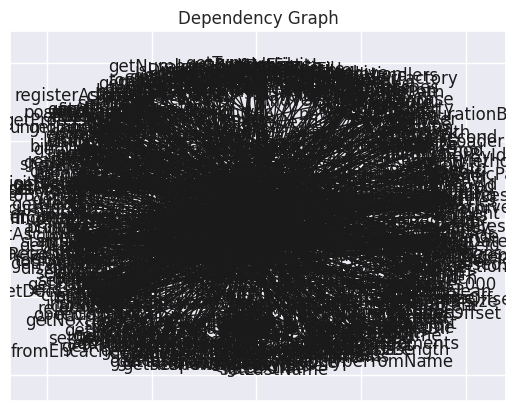

In [ ]:
pos = nx.spring_layout(G, seed=42)

# Draw nodes with labels
#nx.draw(G, pos, with_labels = True, node_color='skyblue', node_size=20)

nx.draw_networkx_labels(G, pos, labels={node: G.nodes[node]['method_name'] for node in G.nodes})

# Draw edges
nx.draw_networkx_edges(G, pos)

# Display the plot
plt.title('Dependency Graph')
plt.show()

# Analysis

In [ ]:
# Structural
for node, info in (G.nodes(data=True)):
  print(f"Node {node}: Method={info['method_name']}, Class= {info['class_name']}")

Node data_RandomAccessDataFile$DataInputStream_<init>: Method=<init>, Class= RandomAccessDataFile$DataInputStream
Node data_RandomAccessDataFile$DataInputStream_read: Method=read, Class= RandomAccessDataFile$DataInputStream
Node data_RandomAccessDataFile$DataInputStream_doRead: Method=doRead, Class= RandomAccessDataFile$DataInputStream
Node data_RandomAccessDataFile$DataInputStream_skip: Method=skip, Class= RandomAccessDataFile$DataInputStream
Node data_RandomAccessDataFile$DataInputStream_cap: Method=cap, Class= RandomAccessDataFile$DataInputStream
Node jar_CentralDirectoryFileHeader_<init>: Method=<init>, Class= CentralDirectoryFileHeader
Node jar_CentralDirectoryFileHeader_load: Method=load, Class= CentralDirectoryFileHeader
Node jar_CentralDirectoryFileHeader_hasName: Method=hasName, Class= CentralDirectoryFileHeader
Node jar_CentralDirectoryFileHeader_isDirectory: Method=isDirectory, Class= CentralDirectoryFileHeader
Node jar_CentralDirectoryFileHeader_getMethod: Method=getMethod,

In [ ]:
!pip install pymoo sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=bc8a82e15ef60c96fd2b668c9f6e7be7619138723de2357279030f1717907d60
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
from sentence_transformers import SentenceTransformer

# Semantic
method_nodes = method_names = [info['method_name'] for node, info in G.nodes(data=True)]
model = SentenceTransformer('bert-base-nli-mean-tokens')
method_embeddings = [model.encode(nodes, convert_to_tensor=True) for nodes in method_nodes]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#**Multi-Objective Algorithm: NSGA-III**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.core.problem import Problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.operators.crossover.pntx import TwoPointCrossover

from pymoo.optimize import minimize
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

**Problem Class Definition**

In [ ]:
# Variables
node_embeddings = method_embeddings
graph = G

In [ ]:
class GraphProblem(Problem):
    # Constructor for the problem object
    def __init__(self, graph, num_clusters, method_embeddings):
        self.graph = graph
        self.num_clusters = num_clusters
        self.num_nodes = len(graph.nodes)
        self.method_embeddings = method_embeddings

        super().__init__(n_var = self.num_nodes,
                         n_obj = 3,
                         xl = np.zeros(self.num_nodes),
                         xu = np.full(self.num_nodes, self.num_clusters -1)
                         )

    # Can serve to generate the initial population: A matrix showcasing the graph nodes distributed in (num clusters) partitions
    # Assigns clusters to each individual (node) in the population with the constraint
    # that each cluster has at least one node
    def distribute_into_clusters(self, pop, n_clusters):
      distributed_pop = np.zeros(len(pop), dtype = int)

      # Validating the constraint
      for i in range(n_clusters):
        nodes_idx = np.where(distributed_pop == i)[0]
        if (len(nodes_idx)) > 0:
          continue

        current_nodes = np.where(distributed_pop == -1)[0]

        if (len(current_nodes)) > 0:
          picked_node = np.random.choice(current_nodes)
          distributed_pop[picked_node] = i

      # Assigning randomly each node left to a cluster
      nodes_left = np.where(distributed_pop == -1)[0]
      for idx in range(len(pop)):
        distributed_pop[idx] = np.random.randint(0, n_clusters)

      return distributed_pop


    # Objective functions
    # coupling function
    def compute_overall_coupling(self, clusters):
      num_clusters = len(clusters)
      total_edges = len(list(self.graph.edges))
      overall_coupling = 0.0

      for i in range(self.num_clusters):
        for j in range(i + 1, self.num_clusters):
          cluster_i = clusters[i]
          cluster_j = clusters[j]

          # Calculate the number of edges between nodes in the two clusters
          coupling_pair = len([edge for edge in self.graph.edges if edge[0] in cluster_i and edge[1] in cluster_j])
          overall_coupling += coupling_pair

      # Calculate the average coupling
      return overall_coupling / total_edges


    # cohesion function
    def cohesion(self, cluster):
      internal_edges = self.graph.subgraph(cluster).edges
      return len(internal_edges) / len(cluster) if len(cluster) > 0 and len(internal_edges) > 0 else 0.0

    # average cohesion
    def compute_average_cohesion(self, clusters):
      total_cohesion = sum(self.cohesion(cluster) for cluster in clusters)

      if self.num_clusters > 0:
        average_cohesion = total_cohesion / self.num_clusters
      else:
        average_cohesion = 0.0

      return -average_cohesion


    # Semantic distance
    def compute_semantic_distance(self, clusters):
      cluster_embeddings = self.method_embeddings
      semantic_distances = np.zeros((self.num_clusters, self.num_clusters))


      for i in range(self.num_clusters):
        for j in range(i + 1, self.num_clusters):
          similarity_matrix = cosine_similarity(cluster_embeddings[i].reshape(1,-1),
                                                cluster_embeddings[j].reshape(1,-1))

          semantic_distances[i, j] = 1.0 - similarity_matrix.item()
          semantic_distances[j, i] = semantic_distances[i, j]

      avg_semantic_distance = np.sum(semantic_distances) / (self.num_clusters * (self.num_clusters - 1) / 2)

      return -avg_semantic_distance


    # Fitness function
    def _evaluate(self, x, out, *args, **kwargs):
      # get the size of the population
      N = x.shape[0]

      clusters = []
      # Assign individuals (nodes) randomly to clusters
      cluster_assignments = self.distribute_into_clusters(x, self.num_clusters)


      # get the nodes content of each cluster using the cluster_assignments
      for i in range(self.num_clusters):
        cluster_indices = np.where(cluster_assignments == i)[0]
        cluster_nodes = [list(self.graph.nodes)[j] for j in cluster_indices]
        clusters.append(cluster_nodes)

      # Placeholder for objective function values
      F = np.zeros((N, self.n_obj))

      # Evaluate objectives for each cluster
      for i in range(N):
        coupling = self.compute_overall_coupling(clusters)
        cohesion = self.compute_average_cohesion(clusters)
        sem_distance = self.compute_semantic_distance(clusters)
        F[i, :] = [coupling, cohesion, sem_distance]

      out["F"] = F

**Instantiation & Execution**

In [ ]:
# Create instance of the problem object
desired_number_of_partitions = 7
problem = GraphProblem(graph, desired_number_of_partitions, method_embeddings)

# Instance of the algorithm object
ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_partitions=desired_number_of_partitions)
algorithm = NSGA3(pop_size=problem.n_var, ref_dirs=ref_dirs)
#sampling = problem.distribute_into_clusters(graph.nodes, desired_number_of_partitions)
crossover= TwoPointCrossover()
#mutation =


# Execution
result = minimize(problem,
                  algorithm,
                  ('n_gen', 200),
                  #crossover=crossover,
                  #sampling=sampling,
                  seed=1,
                  verbose=True)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      750 |      1 |             - |             -
     2 |     1500 |      2 |  1.0000000000 |         ideal
     3 |     2250 |      2 |  0.000000E+00 |             f
     4 |     3000 |      3 |  0.2361871183 |             f
     5 |     3750 |      3 |  0.000000E+00 |             f
     6 |     4500 |      2 |  0.2800000000 |         ideal
     7 |     5250 |      2 |  0.000000E+00 |             f
     8 |     6000 |      2 |  0.000000E+00 |             f
     9 |     6750 |      3 |  0.4318181818 |         ideal
    10 |     7500 |      3 |  0.000000E+00 |             f
    11 |     8250 |      3 |  0.000000E+00 |             f
    12 |     9000 |      3 |  0.000000E+00 |             f
    13 |     9750 |      3 |  0.0818028587 |             f
    14 |    10500 |      3 |  0.2000000000 |         ideal
    15 |    11250 |      4 |  0.1106102417 |             f
    16 |    12000 |      5 |  0.4974959412 |         ide

# **Results**

In [ ]:
# Final solutions
final_solutions = result.X
print("Final Solutions:")
print(final_solutions)
print(len(result.X))

Final Solutions:
[[1.71174737 1.08944303 3.48050756 ... 0.69577442 4.3232319  4.12575521]
 [3.62712448 5.14642112 0.12995517 ... 4.8760337  3.29839029 4.97481202]
 [3.94753376 5.27166567 1.18484643 ... 1.97421968 0.1132607  0.78553103]
 [5.15119356 4.52233963 1.87271397 ... 1.25201167 1.0505768  3.12648919]]
/*/*/*////////////////************************
4


**Representation of the solution**

*   Get the best clustering assignment
*   Generate the node content of each of these clusters



In [ ]:
best_solution_idx = 0
best_clustering = final_solutions[best_solution_idx]
clustered_solution = np.round(best_clustering).astype(int)
print("Population size = ", len(clustered_solution))
print()
print("Individuals : ", clustered_solution)

Population size =  750

Individuals :  [2 1 3 3 2 5 0 2 4 1 4 4 0 3 5 4 2 3 0 1 3 5 2 3 0 2 4 4 3 1 2 1 6 0 4 1 6
 1 2 2 2 5 1 4 1 3 4 6 6 4 2 3 4 4 4 1 2 1 3 2 1 2 4 3 3 5 0 1 1 2 2 0 0 6
 2 5 3 3 4 3 3 1 5 3 6 4 3 1 3 1 2 1 2 2 2 5 1 0 5 2 3 4 2 1 0 2 4 3 5 3 2
 5 3 6 5 3 1 6 0 2 4 0 5 1 5 4 2 6 5 5 1 4 5 5 4 2 3 6 4 4 5 1 1 4 5 1 5 1
 4 0 3 4 4 2 5 1 1 1 2 2 0 4 3 1 4 2 2 1 3 5 3 3 4 5 1 1 5 1 5 4 4 4 5 2 2
 0 0 5 3 1 6 1 4 3 4 2 4 3 1 4 1 2 3 5 3 2 4 0 2 4 2 3 5 2 5 2 4 4 3 5 4 4
 1 5 1 4 5 2 2 6 1 1 4 6 3 4 5 2 1 1 1 4 1 2 5 4 5 5 1 4 5 4 4 2 0 1 2 5 2
 1 4 6 4 4 3 3 0 4 5 1 2 5 1 6 3 2 2 1 2 2 2 6 2 2 2 5 6 3 0 4 2 4 1 0 1 2
 1 1 1 2 1 3 6 6 2 1 1 5 2 6 5 5 5 3 1 3 4 0 1 0 5 5 0 4 5 1 5 4 1 5 5 3 1
 5 1 5 2 4 1 1 4 5 5 6 6 4 2 5 0 0 0 4 4 3 2 1 6 4 4 6 2 2 5 4 0 5 3 6 1 5
 0 1 1 5 2 4 4 6 4 4 4 4 1 4 4 2 2 4 3 5 5 0 5 3 2 2 5 5 4 2 5 4 3 2 5 2 3
 0 5 0 3 0 3 3 1 2 2 4 5 2 3 4 3 1 2 1 3 2 4 2 4 6 3 1 3 3 1 3 1 2 3 0 0 3
 1 1 6 3 6 2 4 4 3 4 4 2 0 3 1 6 3 4 1 2 3 4 5 5 1 2 3 2 5 5 

Converting the clustering assignment to a list of the nodes contained in the different clusters.

In [ ]:
# get the nodes content of each cluster using the cluster_assignments
clusters_content = []
clusters_fullnaming = []
for i in range(problem.num_clusters):
  cluster_idx = np.where(clustered_solution == i)[0]
  node_list = [list(problem.graph.nodes)[j] for j in cluster_idx]
  method_names = [node.split('_')[-1] for node in node_list]
  full_naming = [node.split('_')[-3] + "." + node.split('_')[-2] + "." + node.split('_')[-1] for node in node_list]
  print("Nodes in Cluster ", i, " = ", (full_naming))
  clusters_content.append(method_names)
  clusters_fullnaming.append(full_naming)

Nodes in Cluster  0  =  ['jar.CentralDirectoryFileHeader.load', 'jar.CentralDirectoryFileHeader.getCrc', 'data.RandomAccessDataFile$FileAccess.<init>', 'data.RandomAccessDataFile$FileAccess.access$400', 'jar.CentralDirectoryEndRecord.<init>', 'archive.ExplodedArchive.iterator', 'data.RandomAccessDataFile.getFile', 'data.RandomAccessDataFile.getInputStream', 'archive.JarFileArchive.getNestedArchive', 'loader.PropertiesLauncher$PrefixMatchingArchiveFilter.matches', 'loader.PropertiesLauncher.initializePaths', 'loader.PropertiesLauncher.getMainClass', 'loader.WarLauncher.<init>', 'util.SystemPropertyUtils.findPlaceholderEndIndex', 'jar.JarURLConnection$JarEntryName.toString', 'jar.JarURLConnection$JarEntryName.isEmpty', 'jar.JarURLConnection.getLastModified', 'jar.AsciiBytes.toString', 'jar.JarEntry.setCertificates', 'jar.JarFileEntries.isMetaInfEntry', 'jar.JarFileEntries.applyFilter', 'service.ClinicServiceImpl.findVets', 'config.WebConfig.addViewControllers', 'config.PetclinicPropertie

# Visualisation of clusters in table

In [ ]:
# Solution lists stored into dataframes
solution_df = pd.DataFrame(clusters_content)
solution_full_naming_df = pd.DataFrame(clusters_fullnaming)

# dataframe with only method names shown in clusters
df2 = solution_df.transpose()
df2.columns = [f"Cluster {i+1}" for i in range(len(clusters_content))]

# dataframe with method names and their associated classes
df3 = solution_full_naming_df.transpose()
df3.columns = [f"Cluster {i+1}" for i in range(len(clusters_fullnaming))]
df3

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,jar.CentralDirectoryFileHeader.load,data.RandomAccessDataFile$DataInputStream.read,data.RandomAccessDataFile$DataInputStream.<init>,data.RandomAccessDataFile$DataInputStream.doRead,jar.CentralDirectoryFileHeader.isDirectory,jar.CentralDirectoryFileHeader.<init>,archive.ExplodedArchive$FileEntryIterator.remove
1,jar.CentralDirectoryFileHeader.getCrc,jar.CentralDirectoryFileHeader.getMethod,data.RandomAccessDataFile$DataInputStream.cap,data.RandomAccessDataFile$DataInputStream.skip,jar.CentralDirectoryFileHeader.getTime,jar.CentralDirectoryFileHeader.getSize,jar.CentralDirectoryEndRecord.getStartOfArchive
2,data.RandomAccessDataFile$FileAccess.<init>,data.RandomAccessDataFile$FileAccess.read,jar.CentralDirectoryFileHeader.hasName,jar.CentralDirectoryFileHeader.getCompressedSize,jar.CentralDirectoryFileHeader.decodeMsDosForm...,data.RandomAccessDataFile$FileAccess.close,jar.Handler.getFileFromContext
3,data.RandomAccessDataFile$FileAccess.access$400,archive.ExplodedArchive$FileEntryIterator.next,jar.CentralDirectoryFileHeader.fromRandomAcces...,jar.CentralDirectoryFileHeader.<clinit>,jar.CentralDirectoryFileHeader.clone,jar.Handler.isUrlInJarFile,jar.Handler.trimToJarRoot
4,jar.CentralDirectoryEndRecord.<init>,archive.ExplodedArchive$FileEntryIterator.poll,data.RandomAccessDataFile$FileAccess.readByte,data.RandomAccessDataFile$FileAccess.openIfNec...,archive.ExplodedArchive$FileEntryIterator$Entr...,archive.ExplodedArchive.getNestedArchives,data.RandomAccessDataFile.getSubsection
...,...,...,...,...,...,...,...
133,None,model.Owner.setTelephone,web.PetResource$PetRequest.getId,None,util.Date.<init>,None,None
134,None,None,util.Collection.iterator,None,None,None,None
135,None,None,service.ClinicService.savePet,None,None,None,None
136,None,None,service.ClinicService.findAll,None,None,None,None


In [ ]:
'''
# Storing the results
location = '/content/drive/MyDrive/Data -- Dependencies/Ground Truth/CSV files - Clusters/'
df2.to_csv(location+"Feb10-Monolithic-petclinic-processed-MicID.csv", index=False)
df3.to_csv(location+"Feb10-Fullname_petclinic_monolith_MicID_processed.csv", index=False)
'''

**Pareto front**
Objective function values of the non-dominated solutions

In [ ]:
pareto_front = result.F
print("Pareto-front")
print(pareto_front)

Pareto-front
[[ 0.33820307 -0.29873044 -0.46345735]
 [ 0.34623813 -0.30984541 -0.46345735]
 [ 0.3725347  -0.33208186 -0.46345735]
 [ 0.37764792 -0.35180397 -0.46345735]]


Numerical Representation of the Pareto Front

In [ ]:
pareto_df = pd.DataFrame(np.round(pareto_front, decimals = 3), columns = ['Coupling', 'Cohesion', 'Semantic distance'])
'''
# Storing the results
pareto_df.to_csv(location + "Pareto-result.csv", index=False)
'''
pareto_df

,Coupling,Cohesion,Semantic distance
0,0.338,-0.299,-0.463
1,0.346,-0.310,-0.463
2,0.373,-0.332,-0.463
3,0.378,-0.352,-0.463
